Null values in dataset:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


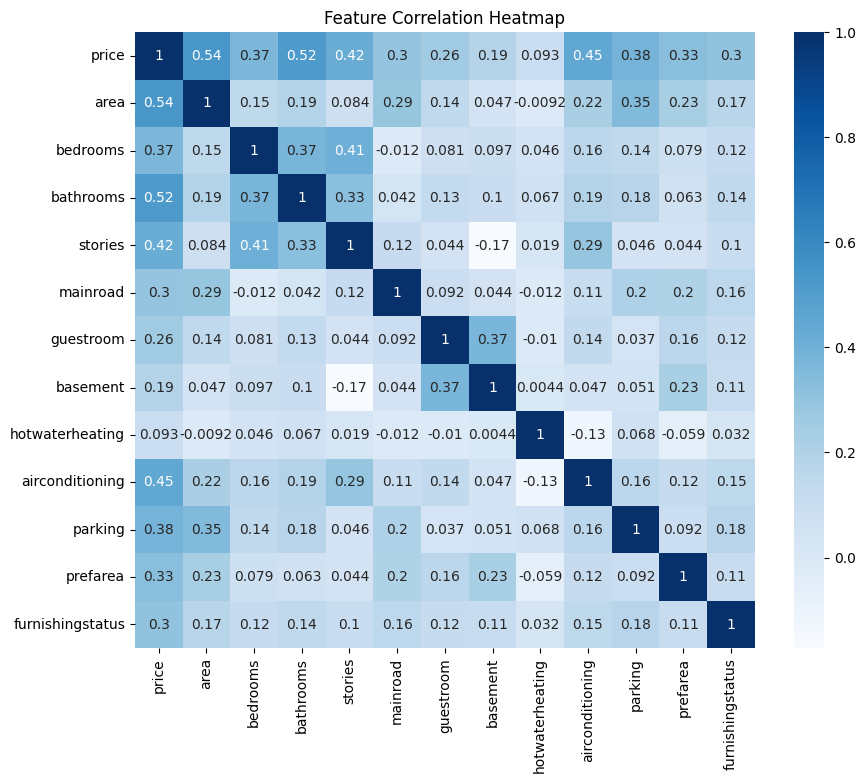

MAE: 898629.2950371035
MSE: 1602773742287.9998
R2 Score: 0.6183140939593399


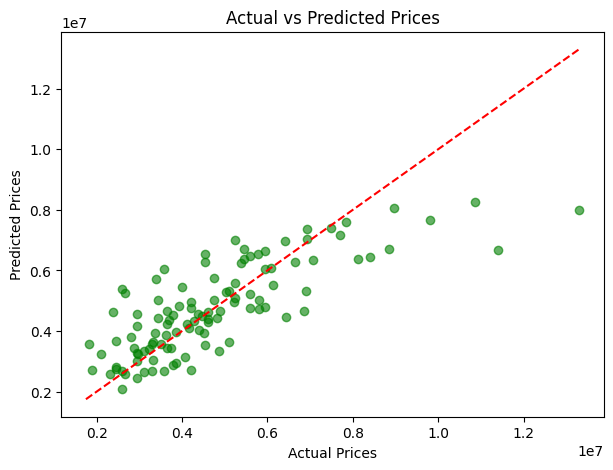

Model Coefficients:
                    Coefficient
area              2.344747e+02
bedrooms          9.576997e+04
bathrooms         1.039628e+06
stories           4.931340e+05
mainroad          4.310575e+05
guestroom         3.280976e+05
basement          4.910099e+05
hotwaterheating   9.408724e+05
airconditioning   6.693352e+05
parking           2.637637e+05
prefarea          5.892904e+05
furnishingstatus  1.983943e+05


In [3]:
# Task 3 - Linear Regression Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv('Housing.csv')
df.head()

# Preprocessing categorical data
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Checking for null values
print("Null values in dataset:\n", df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.show()

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Model training
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predictions
y_pred = lr.predict(x_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

# Scatter plot - Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

# Coefficients of the model
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:\n", coef_df)
